Training period: 7/13/2011 -> 7/13/2016

Test period: 7/13/2016 -> 11/03/2021

Then under your variables in spyder duble click the "algo" object and a pop-up window should show.

Now dubble click on the subsetMST list object to get the current MST run from the app.

              MINT          VCSH           XLP          SPLV           TFI
MINT  5.371623e-07  8.221831e-07  9.018184e-07  1.081572e-06  1.198361e-06
VCSH  8.221831e-07  5.816355e-06  6.319511e-06  6.627797e-06  5.957582e-06
XLP   9.018184e-07  6.319511e-06  2.387995e-04  2.129861e-04  6.342537e-08
SPLV  1.081572e-06  6.627797e-06  2.129861e-04  2.301777e-04  9.999824e-08
TFI   1.198361e-06  5.957582e-06  6.342537e-08  9.999824e-08  2.987930e-05
                MINT       XLU       SMH       XBI    SEMB.L
MINT    5.371623e-07  0.000002  0.000002  0.000005  0.000001
XLU     1.511325e-06  0.000377  0.000182  0.000069  0.000038
SMH     1.658454e-06  0.000182  0.000817  0.000595  0.000006
XBI     4.571153e-06  0.000069  0.000595  0.002001  0.000058
SEMB.L  1.400550e-06  0.000038  0.000006  0.000058  0.000206
STD:  0.006252445273682499
STD_MST:  0.01457907951552514
Max_DD:  0.050886854982691965
Max_MSTDD:  0.0712415969757687


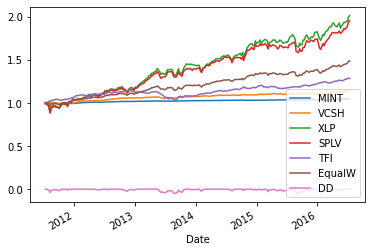

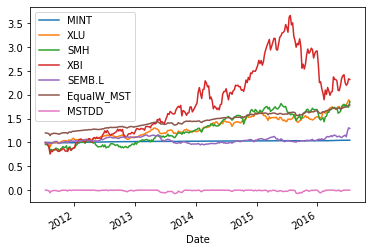

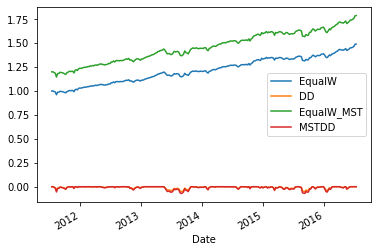

In [6]:
import pandas as pd

#MST

#Strategi 1

dat = pd.read_excel("/content/ALL_data.xlsx",index_col=0)

SR = ((dat+1).pow(52/257).product()-1)/dat.std()/52**0.5
SR=SR.sort_values(ascending=False)
TOP200=SR.iloc[0:200].index
# Der er ikke engang 200... kun 179??????? Jeg lader bare MST kører på alt
SRCOV=dat[SR[:5].index].cov()
SR_ass_earn=(dat[SR[:5].index]+1).cumprod()
SR_ass_earn["EqualW"] = SR_ass_earn.sum(axis=1)/5
SR_ass_earn["DD"]=SR_ass_earn["EqualW"]-SR_ass_earn["EqualW"].cummax()

#SR_MDD = max(DD)
#print(SR_MDD)
SR_ass_earn.plot()
STD = (dat[SR[:5].index].sum(axis=1)/5).std()
#Strategi 2
dat = pd.read_excel("/content/MST_data.xlsx",index_col=0)
SR = ((dat+1).pow(52/257).product()-1)/dat.std()/52**0.5
SR=SR.sort_values(ascending=False)
SR=SR.iloc[0:5]
SRMSTCOV=dat[SR.index].cov()
SRMST_ass_earn=(dat[SR.index]+1).cumprod()
SRMST_ass_earn["EqualW_MST"] = SR_ass_earn.sum(axis=1)/5
SRMST_ass_earn["MSTDD"]=SRMST_ass_earn["EqualW_MST"]-SRMST_ass_earn["EqualW_MST"].cummax()
SRMST_ass_earn.plot()
STDMST = (dat[SR[:5].index].sum(axis=1)/5).std()
#Sammenlign
pd.concat([SR_ass_earn[["EqualW","DD"]],SRMST_ass_earn[["EqualW_MST","MSTDD"]]],axis=1).plot()
print(SRCOV)
print(SRMSTCOV)
print("STD: ",STD)
print("STD_MST: ",STDMST)
print("Max_DD: ", -min(SR_ass_earn["DD"]))
print("Max_MSTDD: ", -min(SRMST_ass_earn["MSTDD"]))



Den vakse student vil have opdaget at SR ikke er udregnet i den rigtige række følge. Dog potens er destributiv over multiplikation så no worries. Som en sjov side note er rækkefølgen af oprationer faktisk et centralt emne af talteori, hvis en stundent skulle føle sig fristet til at følge op på sådane typer for sisyfosarbejde.

1MST_SR:  -0.04397478351962295
1MST_STD:  0.035827833120154765
1MST_MAXDD:  0.35528615309884204


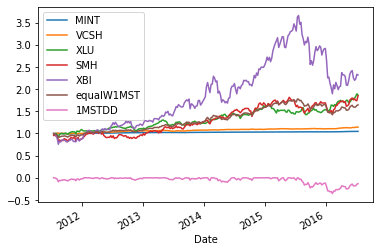

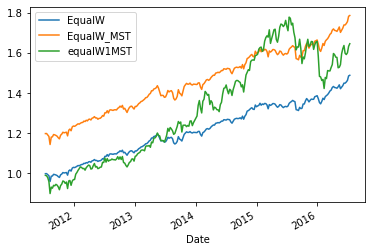

In [7]:
#MST

#Strategi 1
dat = pd.read_excel("/content/ALL_data.xlsx",index_col=0)
data = pd.read_excel("/content/CLUST_data.xlsx",index_col=0)

dat1,dat2,dat3 = [ data.loc[data["Cluster"] == "Cluster "+str(i)] for i in range(1,4)]

dat1,dat2,dat3 = [dat[df.index] for df in [dat1,dat2,dat3]]
SR1,SR2,SR3 = [((df+1).pow(52/257).product()-1)/df.std()/52**0.5 for df in [dat1,dat2,dat3]]
maxid_small = pd.concat([SR2,SR3],axis=0).idxmax()
max_small = dat[maxid_small]
dat1MST = pd.read_excel("/content/MSTNEW_data.xlsx",index_col=0)
dat1MST[maxid_small] = max_small
SR1MST = ((dat1MST+1).pow(52/257).product()-1)/dat1MST.std()/52**0.5
SR1MST=SR1MST.sort_values(ascending=False)
SR1MST=SR1MST.iloc[0:5]
SR1MSTCOV=dat[SR1MST.index].cov()
SR1MSTCOV
dat1MST = (dat1MST[SR1MST.index]+1).cumprod()
dat1MST["equalW1MST"] = dat1MST.sum(axis=1)/5
dat1MST["1MSTDD"] = dat1MST["equalW1MST"] - dat1MST["equalW1MST"].cummax()
dat1MST.plot()
pd.concat([SR_ass_earn["EqualW"],SRMST_ass_earn["EqualW_MST"],dat1MST["equalW1MST"]],axis=1).plot()

print("1MST_SR: ",((dat1MST["equalW1MST"].iloc[-1]-dat1MST["equalW1MST"].iloc[0])**(52/257)-1)/dat1MST["equalW1MST"].std()/52**0.5 )
print("1MST_STD: ", dat1MST["equalW1MST"].std()/52**0.5)
print("1MST_MAXDD: ", -min(dat1MST["1MSTDD"]))